In [19]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [20]:
data = pd.read_csv('Analytics Data Location 20200301-20200909.csv')

In [21]:
data.head()

,Country,Source,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Goal Conversion Rate,Goal Completions,Goal Value
0,Nigeria,(direct),120,120,156,63.46%,1.78,00:02:10,4.49%,7,$0.00
1,Nigeria,google,101,99,137,68.61%,1.88,00:03:02,3.65%,5,$0.00
2,United Arab Emirates,(direct),83,83,85,60.00%,1.74,00:00:16,0.00%,0,$0.00
3,United States,google,41,40,50,74.00%,1.68,00:01:07,0.00%,0,$0.00
4,Nigeria,linkedin.com,40,39,53,71.70%,1.58,00:00:56,5.66%,3,$0.00


In [22]:
data.describe()

,Users,New Users,Sessions,Pages / Session,Goal Completions
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,16.680000,16.220000,20.080000,1.721800,0.560000
std,24.152948,24.088519,30.703879,0.567669,1.579977
min,3.000000,3.000000,3.000000,1.100000,0.000000
25%,5.000000,4.250000,6.000000,1.335000,0.000000
50%,7.000000,7.000000,8.000000,1.570000,0.000000
75%,14.750000,13.000000,20.000000,1.970000,0.000000
max,120.000000,120.000000,156.000000,4.550000,7.000000


In [23]:
def histogram(data):
    for i in data.columns:
        fig, ax = plt.subplots()
        fig.set_size_inches(15.7, 12.27)
        print(i, '\n')
        plt.hist(data[i])
        plt.show()

In [24]:
data.drop(['Goal Value'], axis = 1, inplace = True)

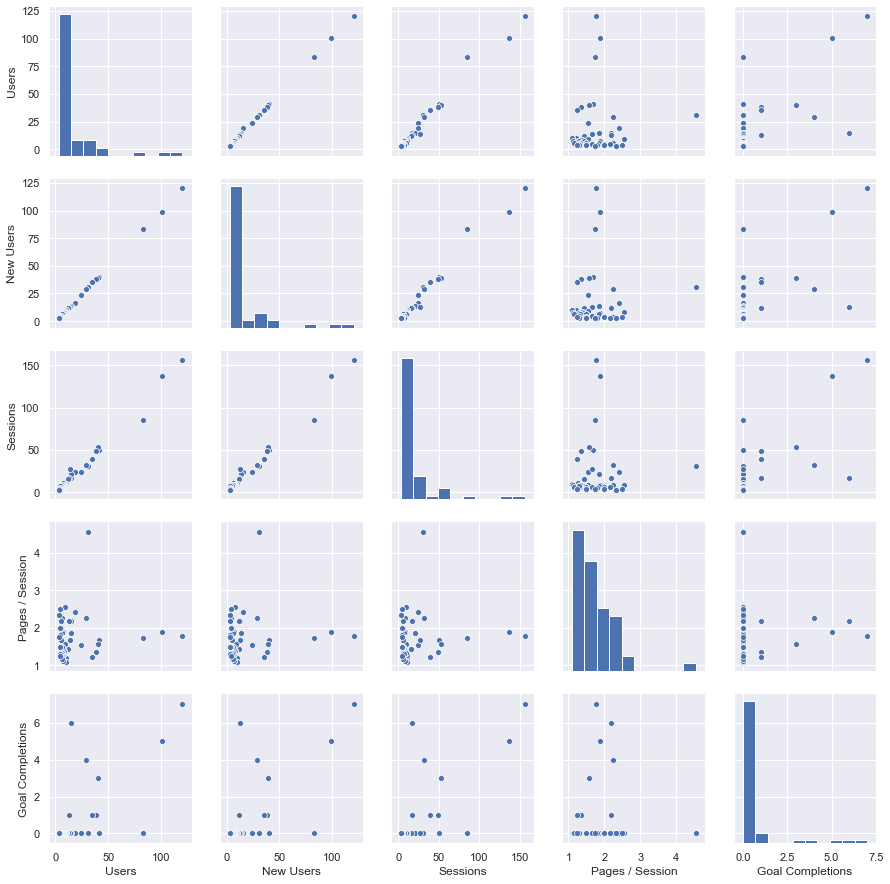

In [25]:
sns.pairplot(data)

In [26]:
#Plots for categorical variables

# Box Plot
def box(x, y, data):
    fig_dims = (20, 14)
    fig, ax = plt.subplots(figsize=fig_dims)
    sns.boxplot(x = x, y =y, data = data, ax = ax)

# Violin Plot
def violin(x, y, data):
    sns.violinplot(x = x, y =y, data = data)
    
# Boxen Plot 
def boxen(x, y, data):
    sns.boxenplot(x = x, y =y, data = data)

In [27]:
data.columns

Index(['Country', 'Source', 'Users', 'New Users', 'Sessions', 'Bounce Rate',
       'Pages / Session', 'Avg. Session Duration', 'Goal Conversion Rate',
       'Goal Completions'],
      dtype='object')

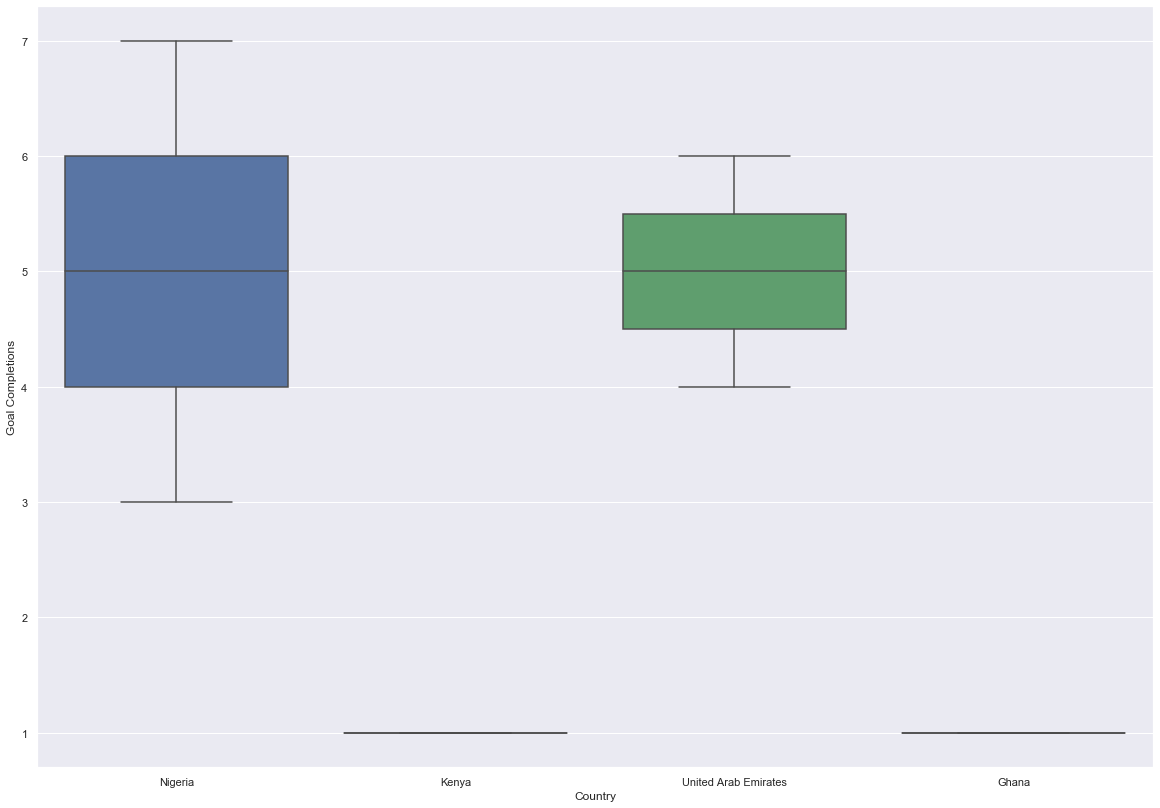

In [28]:
box(data['Country'][data['Goal Completions'] > 0], data['Goal Completions'], data)

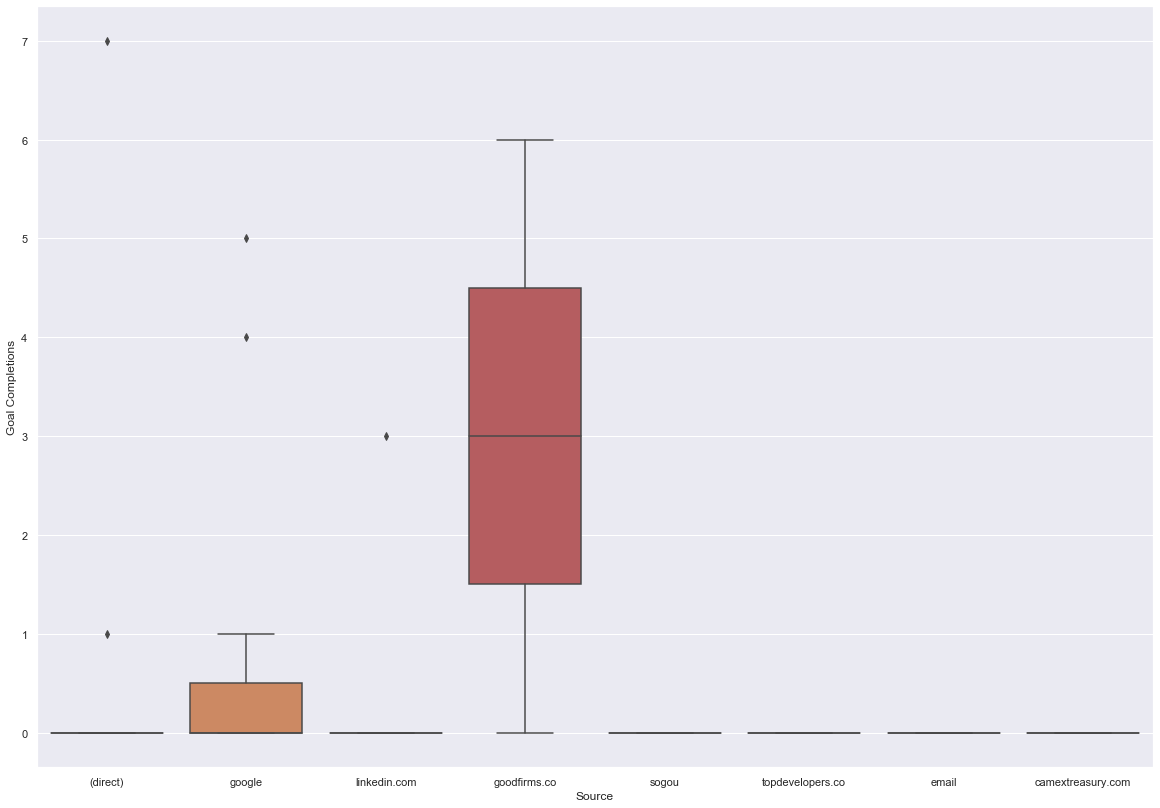

In [29]:
box(data['Source'], data['Goal Completions'], data)

In [30]:
data[data['Goal Completions'] > 0].groupby(['Country', 'Source'])['Goal Completions'].sum()

Country               Source      
Ghana                 google          1
Kenya                 (direct)        1
                      google          1
Nigeria               (direct)        7
                      google          5
                      linkedin.com    3
United Arab Emirates  goodfirms.co    6
                      google          4
Name: Goal Completions, dtype: int64

In [31]:
data[data['Goal Completions'] > 0].groupby(['Country', 'Source'])['Goal Completions'].sum()

Country               Source      
Ghana                 google          1
Kenya                 (direct)        1
                      google          1
Nigeria               (direct)        7
                      google          5
                      linkedin.com    3
United Arab Emirates  goodfirms.co    6
                      google          4
Name: Goal Completions, dtype: int64

In [50]:
px.bar(data[data['Goal Completions'] > 0].groupby(['Country', 'Source'])['Goal Completions'].sum().sort_values(ascending=False).reset_index(),
       x='Country',
       y='Goal Completions',
       hover_name='Source',
       color="Source",
       title= 'Goals completed - Source and Country'
      )

 # Goal Completions Analysis done

# _______________________________________________________________

# Number of Users Analysis

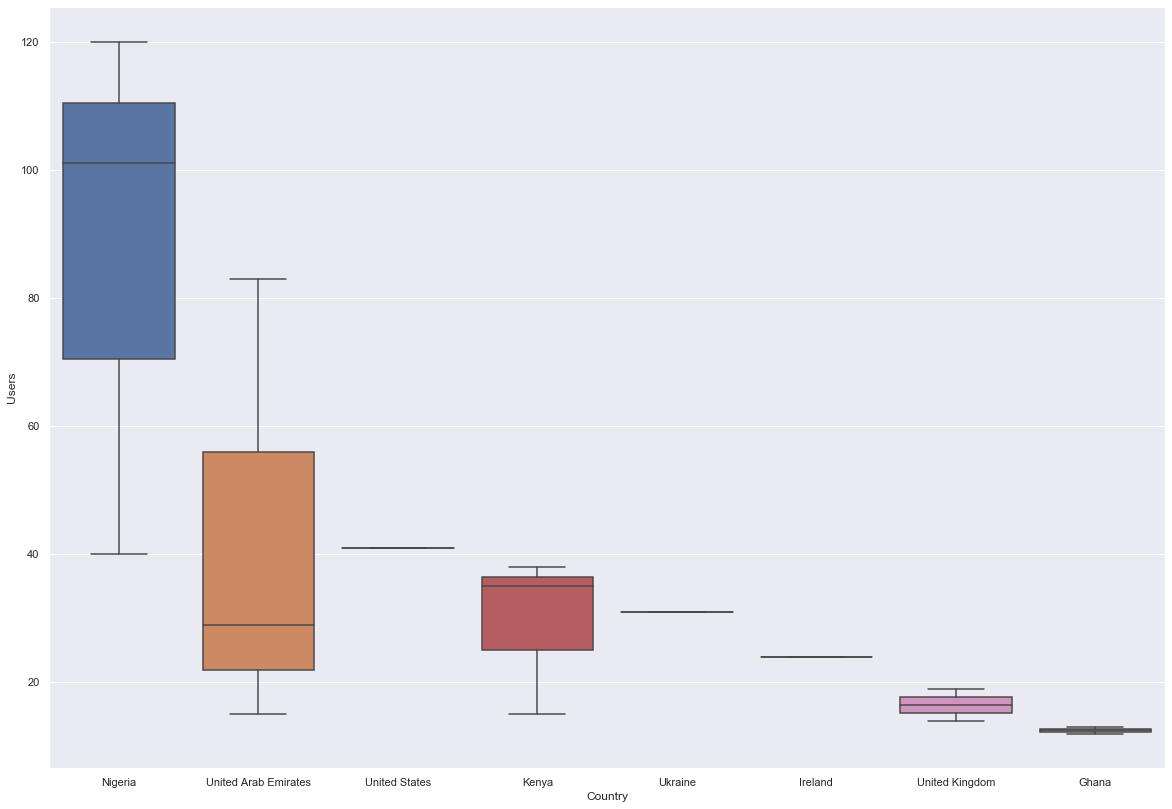

In [32]:
box(data['Country'][data['Users'] > 10], data['Users'], data)

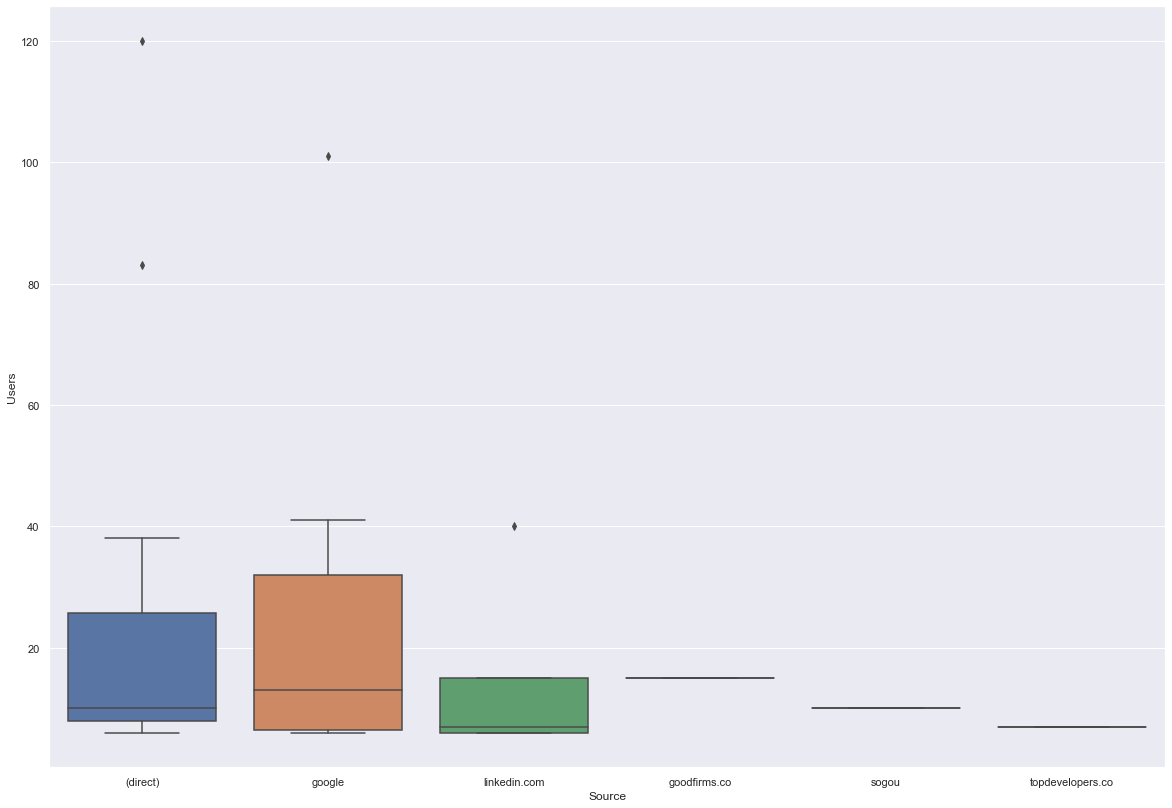

In [33]:
box(data['Source'][data['Users'] > 5], data['Users'], data)

In [34]:
data[data['Users'] >= 5].groupby(['Country', 'Source'])['Users'].sum()

Country               Source          
(not set)             (direct)              9
                      google                5
Canada                (direct)              9
                      google                6
China                 (direct)             10
                      sogou                10
Côte d’Ivoire         (direct)              5
Ghana                 (direct)             12
                      google               13
                      linkedin.com          7
Indonesia             google                7
Ireland               (direct)             24
Japan                 (direct)             10
Kenya                 (direct)             38
                      google               35
                      linkedin.com         15
Malaysia              google                6
Netherlands           (direct)              8
Nigeria               (direct)            120
                      google              101
                      linkedin.com       

In [53]:
px.bar(data[data['Users'] >= 5].groupby(['Country', 'Source'])['Users'].sum().sort_values(ascending=False).reset_index(),
       x='Country',
       y='Users',
       hover_name='Source',
       color="Source",
       labels = {'Users' : 'Traffic'},
       title= 'Web Traffic - Source and Country'
      )

In [35]:
z = data.groupby(['Country', 'Source'])['Users'].sum().to_frame(name = 'Web Users').reset_index()
z.head()

,Country,Source,Web Users
0,(not set),(direct),9
1,(not set),google,5
2,Bangladesh,(direct),3
3,Canada,(direct),9
4,Canada,google,6


In [36]:
z.to_csv('Output.csv')

### Analysis point out to the following points 
1) Source: Higher goal completions via goodfirms.co, Few from google and one or 2 direct/linkedin and none from others

2) Country: Goals are achieved via countires - Nigeria and UAE mostly and a single from Kenya and Ghana

3) Users: Most of the users are from Nigeria, UAE, US and UK. 
